# Handwritten Digit Recognition
## With MNIST Dataset
### Autor: Carlos Kassab Andre
### Ingenieria de Software 


#### Firewall Windows Defender has been disabled

The original MNIST Database: http://yann.lecun.com/exdb/mnist/


        

## Reading the MNIST Dataset

This part of the code is taken from: https://stackoverflow.com/questions/43149272/cannot-get-mnist-database-through-anaconda-jupyter 

In [3]:
import os
from urllib.request import urlretrieve
import numpy as np

def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# We then define functions for loading MNIST images and labels.
# For convenience, they also download the requested files if needed.
import gzip

def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    # The inputs are vectors now, we reshape them to monochrome 2D images,
    # following the shape convention: (examples, channels, rows, columns)
    data = data.reshape(-1, 1, 28, 28)
    # The inputs come as bytes, we convert them to float32 in range [0,1].
    # (Actually to range [0, 255/256], for compatibility to the version
    # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
    return data / np.float32(256)

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the labels in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    # The labels are vectors of integers now, that's exactly what we want.
    return data


X_train = load_mnist_images('train-images-idx3-ubyte.gz')
y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [4]:
X_train.shape


(60000, 1, 28, 28)

In [5]:
y_train.shape

(60000,)

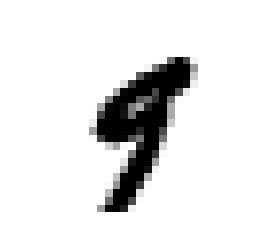

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X_train[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
y_train[36000]

9

In [8]:
print(y_train[:15])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


## Training a Binary Classifier

In [9]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

### El clasificador SGD tiene la ventaja de ser capaz de manejar datasets de gran tamaño de manera eficiente.

In [10]:
from sklearn.linear_model import SGDClassifier

X_tt = X_train[:]
X_tt = X_tt.reshape(60000,784)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_tt, y_train_5)


C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([X_tt[0]])

array([ True])

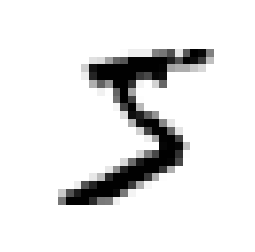

In [12]:
some_digit = X_tt[0]

some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

## Evaluating Model's Performance

> Cross-Validation: Consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones

In [13]:
from sklearn.model_selection import cross_val_score

twod_X_train= X_train.reshape(60000, 784) 

cross_val_score(sgd_clf, twod_X_train, y_train_5, cv = 3, scoring="accuracy")

C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\l

array([0.9703 , 0.9643 , 0.96895])

##  "Dumb" Classifier

In [14]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, twod_X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

> Esto demuestra por qué la precisión no es generalmente la medida de rendimiento preferida para los clasificadores, especialmente cuando se trata de datasets sesgados (es decir, cuando algunas clases son mucho más frecuentes que otras).

## Confusion Matrix
> La idea general es contar el número de veces que las instancias de la clase A se clasifican como clase B.


In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, twod_X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
#Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\l

array([[53862,   717],
       [ 1212,  4209]], dtype=int64)

#### Cada fila representa una clase real, mientras que cada columna representa una clase predicha

## Precision and Recall


In [16]:
from sklearn.metrics import precision_score, recall_score

print("Precision score:",precision_score(y_train_5, y_train_pred))
print("Recall score:", recall_score(y_train_5, y_train_pred))

Precision score: 0.8544457978075518
Recall score: 0.7764250138350858


> The F1 score is the harmonic mean of
precision and recall

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8135691504783995

>  increasing precision reduces recall, and vice versa. This is
called the precision/recall tradeoff.

## Precision/Recall Tradeoff

In [18]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[1.51846305]
[ True]


In [19]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\l

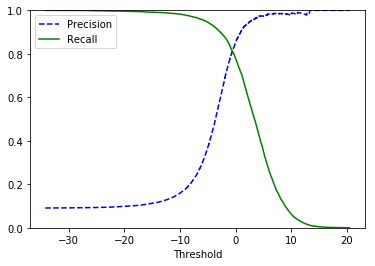

In [20]:
y_scores = cross_val_predict(sgd_clf, twod_X_train, y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [21]:
y_train_pred_90 = (y_scores > 70000)

print(y_scores)
print("Precision:", precision_score(y_train_5, y_train_pred_90))
print("Recall:", recall_score(y_train_5, y_train_pred_90))

[  2.55289352  -8.31757655 -17.75902506 ...   7.31305993  -8.19867557
  -9.07131108]
Precision: 0.0
Recall: 0.0


C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## The receiver operating characteristic (ROC) curve

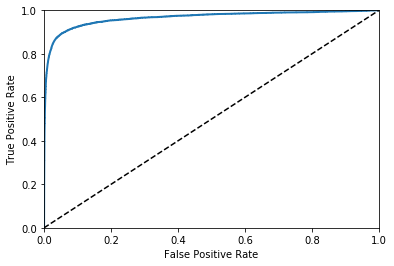

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()



## Area Under the Curve (AUC)

In [23]:
from sklearn.metrics import roc_auc_score
print("ROC AUC:", roc_auc_score(y_train_5, y_scores))


ROC AUC: 0.9658085859807053


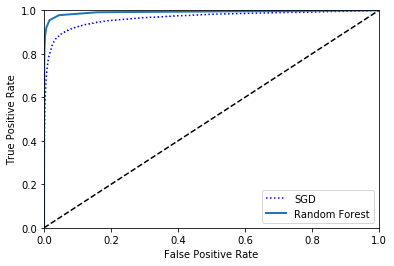

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, twod_X_train, y_train_5, cv=3,
method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [25]:
print("ROC AUC Forest:", roc_auc_score(y_train_5, y_scores_forest))

ROC AUC Forest: 0.9920527492698306


## Multiclass Classification 
> + one-versus-all (OvA) 
+ one-versus-one (OvO)

In [26]:
sgd_clf.fit(twod_X_train,y_train)
sgd_clf.predict([some_digit])

C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5], dtype=uint8)

#### Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score. 

In [27]:
some_digit_scores = sgd_clf.decision_function([some_digit]) 
print(some_digit_scores)

print(np.argmax(some_digit_scores))
print(sgd_clf.classes_)
print(sgd_clf.classes_[5])


[[-32.84390002 -12.81705364  -7.83983346  -0.45648247 -20.43641676
    1.51846305 -14.49057196 -10.0158081  -19.81824642 -10.52224282]]
5
[0 1 2 3 4 5 6 7 8 9]
5


### force ScikitLearn to use one-versus-one or one-versus-all

In [28]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(twod_X_train, y_train)
print(ovo_clf.predict([some_digit]))
print(len(ovo_clf.estimators_))



C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\l

C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\l

C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\l

[5]
45


### Training a RandomForestClassifier 

In [29]:
forest_clf.fit(twod_X_train, y_train)
print(forest_clf.predict([some_digit]))
print(forest_clf.predict_proba([some_digit]))

[5]
[[0.  0.  0.  0.2 0.  0.8 0.  0.  0.  0. ]]


In [30]:
cross_val_score(sgd_clf, twod_X_train, y_train, cv=3, scoring="accuracy")


C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\l

array([0.88722256, 0.8879444 , 0.87238086])

### simply scaling the inputs 

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(twod_X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\l

array([0.90736853, 0.90884544, 0.91363705])

## Error Analysis


In [32]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx


C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\LabTel2\Anaconda3\l

array([[5726,    2,   26,   12,   11,   47,   47,    9,   39,    4],
       [   1, 6479,   42,   33,    8,   39,    8,    9,  113,   10],
       [  55,   35, 5319,  104,   79,   20,  106,   51,  174,   15],
       [  45,   40,  145, 5372,    3,  210,   33,   50,  135,   98],
       [  17,   26,   38,    8, 5361,    5,   57,   31,   86,  213],
       [  74,   38,   43,  199,   71, 4584,  116,   26,  175,   95],
       [  33,   22,   43,    2,   42,   90, 5640,    3,   43,    0],
       [  24,   23,   73,   29,   60,   12,    4, 5774,   18,  248],
       [  49,  165,   73,  150,   16,  153,   50,   24, 5038,  133],
       [  39,   31,   26,   92,  163,   35,    3,  177,   79, 5304]],
      dtype=int64)

### image representation of the confusion matrix

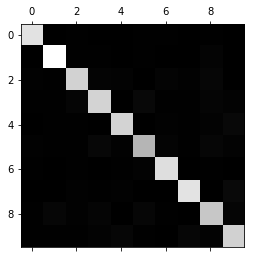

In [33]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

## Compare error

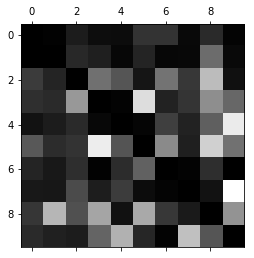

In [34]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## Analyzing individual errors

##### https://github.com/ageron/handson-ml/issues/257

In [35]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

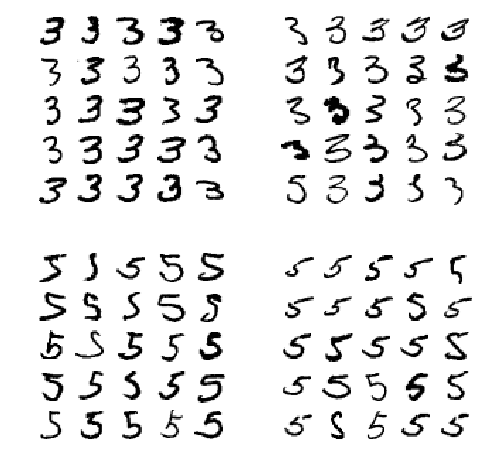

In [36]:
import matplotlib.pyplot as plt
cl_a, cl_b = 3, 5
X_aa = twod_X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = twod_X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = twod_X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = twod_X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


## Multilabel Classification

In [37]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7) 
y_train_odd = (y_train % 2 == 1) 
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier() 
knn_clf.fit(twod_X_train, y_multilabel)
knn_clf.predict([some_digit])



array([[False,  True]])

In [38]:
y_train_knn_pred = cross_val_predict(knn_clf, twod_X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

0.9671989524961443

<div style="color:red"> 
    <h2>PELIGRO</h2> 
    <h3>Los siguientes dos bloques que codigo no son funcionales</h3> 
</div>

## Multioutput Classification


In [45]:
twod_X_test = X_test.reshape(10000, 784) 

noise = np.random.randint(0, 100, (len(twod_X_train), 784))
X_train_mod = twod_X_train + noise
noise = np.random.randint(0, 100, (len(twod_X_test), 784))
X_test_mod = twod_X_test + noise
y_train_mod = twod_X_train
y_test_mod = twod_X_test

In [46]:
knn_clf.fit(X_train_mod,y_train_mod) 
clean_digit=knn_clf.predict([X_test_mod[some_index]]) 
plot_digit(clean_digit)


ValueError: Unknown label type: 'continuous-multioutput'

# Reconocimiento de Numeros Escritos a Mano
### Funcion que permite transformar una imagen a una lista de 784 elementos
#### Obtenida de: https://www.youtube.com/watch?v=yi_dDsRqvK0

<div style="color:red"> 
    <h3>La imagen fue generada con el programa de escritorio 'Paint' con una dimension de 28 x 28 px</h3> 
</div>

In [74]:
from PIL import Image, ImageFilter


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    #print(tva)
    return tva

#El archivo debe de estar ubicado en la misma carpeta del archivo actual
prueba=imageprepare('./prueba.png')#file path here


#print(len(x))# mnist IMAGES are 28x28=784 pixels

> La imagen transformada anteriormente esta en forma de lsta, sin embargo, los clasificadores solo funcionan con arreglos

In [75]:
prueba_array =  np.asarray(prueba)

### Se muestra la imagen trasnformada mediante plt

Este es un numero de prueba:


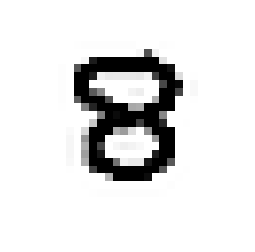

In [76]:
prueba_digit_image = prueba_array.reshape(28, 28)
plt.imshow(prueba_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
print('Este es un numero de prueba:')
plt.show()

### Utilizamos en primer lugar el clasificador SGD para predecir el numero ingresado en la imagen 

In [77]:
print('El numero de prueba es predicho como:', sgd_clf.predict(prueba_array.reshape(1,-1)))

El numero de prueba es predicho como: [9]


### Ahora utilizamos el clasificador KNN definidor anteriormente, el cual determina en primer lugar si el numero es impar y en segundo lugar si es mayor a siete

In [78]:
print('Clases para para el numero de prueba es:', knn_clf.predict(prueba_array.reshape(1,-1)))


Clases para para el numero de prueba es: [[False  True]]


### Nuevamente utilizamos el clasificador SGD para predecir el numero ingresado en la imagen pero ahora utilizaremos los scores para definirlo

In [79]:
prueba_digit_scores = sgd_clf.decision_function(prueba_array.reshape(1,-1)) 
print('Puntajes para el digito es:', prueba_digit_scores)
print('Clase predicha:',np.argmax(prueba_digit_scores))

Puntajes para el digito es: [[-23.08284808 -19.78030762 -10.53825841  -6.65166215  -6.27553104
   -5.9275131   -8.28712095 -10.88051212  -7.92853076  -2.76236207]]
Clase predicha: 9


### Ahora se hara uso del clasificador RandomForest

In [80]:
forest_clf.predict(prueba_array.reshape(1,-1))

array([8], dtype=uint8)